<a href="https://colab.research.google.com/github/najla25naena/codsoft/blob/main/bank_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,f1_score,classification_report,accuracy_score,r2_score

df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.size

140000

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
print(df['Geography'].unique())
print(df['Gender'].unique())
print(df['NumOfProducts'].unique())
print(df['HasCrCard'].unique())
print(df['IsActiveMember'].unique())
print(df['Exited'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]
[1 0]


Text(0.5, 1.0, 'Disturbution of Geography')

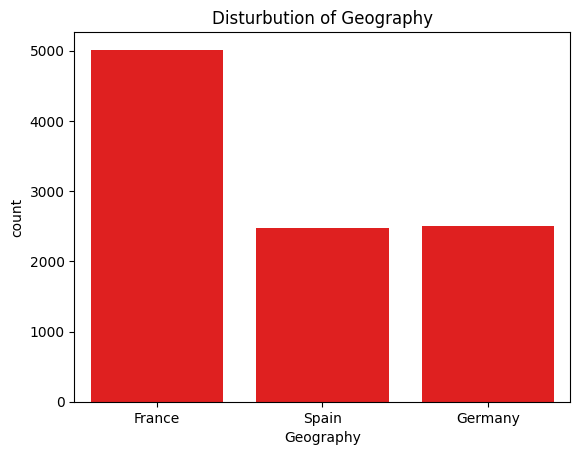

In [ ]:
import seaborn as sns
sns.countplot(x='Geography',data=df,color="red")
plt.title('Disturbution of Geography')

<Axes: xlabel='Geography', ylabel='Count'>

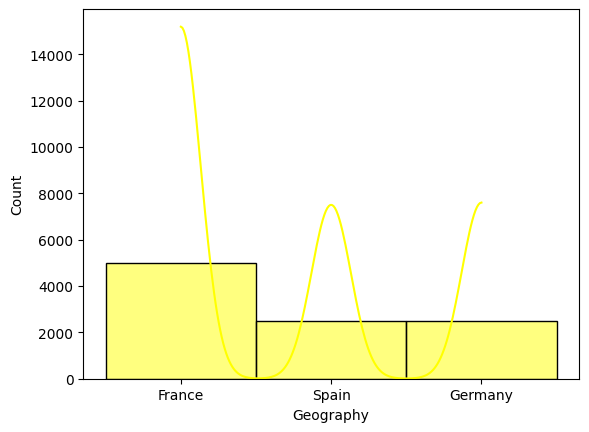

In [ ]:
sns.histplot(df['Geography'],kde=True,bins=10,color='yellow')

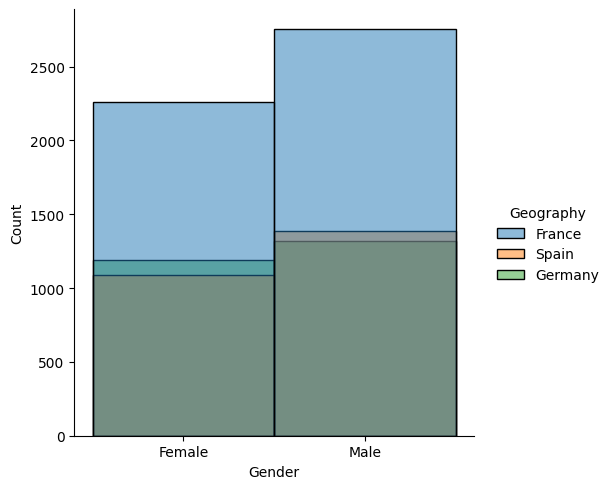

In [ ]:
sns.displot(df,x='Gender',kind='hist',hue='Geography')

Text(0.5, 1.0, 'Disturbution of Gender')

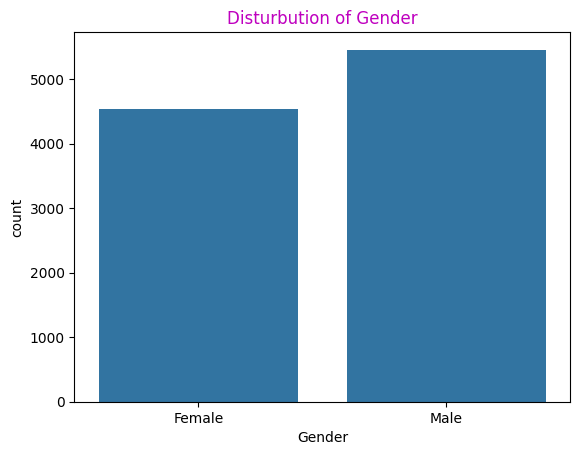

In [ ]:
sns.countplot(x='Gender',data=df)
plt.title("Disturbution of Gender",color="m")

Text(0.5, 1.0, 'Geography disturbution')

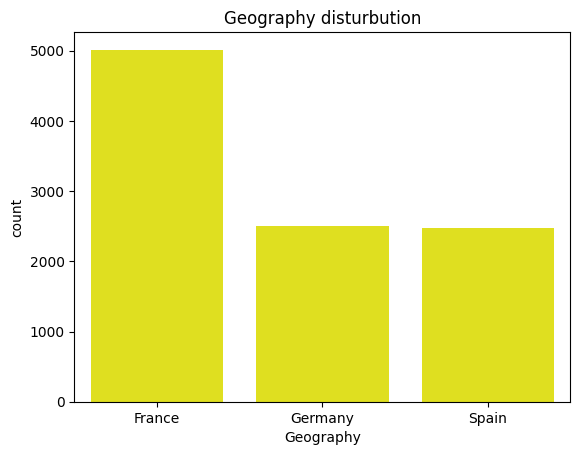

In [ ]:
y=df['Geography'].value_counts()
sns.barplot(x=y.index,y=y.values,color='yellow')
plt.ylabel('count')
plt.title('Geography disturbution')

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
col=['Geography','Gender']
for i in col:
  df[i]=lb.fit_transform(df[i])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x=df.drop(['Exited'],axis=1)
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
y=df['Exited']
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9069,619,2,0,32,4,175406.13,2,1,1,172792.43
2603,643,1,0,34,7,160426.07,1,0,1,188533.11
7738,561,0,1,33,6,0.00,2,0,0,173680.39
1579,618,1,1,41,8,37702.79,1,1,1,195775.48
5058,714,0,1,37,9,148466.93,2,0,1,151280.96
...,...,...,...,...,...,...,...,...,...,...
5734,768,0,1,54,8,69712.74,1,1,1,69381.05
5191,682,0,0,58,1,0.00,1,1,1,706.50
5390,735,0,0,38,1,0.00,3,0,0,92220.12
860,667,0,1,43,8,190227.46,1,1,0,97508.04


In [ ]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
models=[]
accuracy=[]
m=['logistic regression', 'random forest','gradient boosting']
lr_model=LogisticRegression()
rf_model=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)
gb_model=GradientBoostingClassifier(n_estimators=1000,learning_rate=0.02,max_depth=1,random_state=42)
lst=[lr_model, rf_model, gb_model]
count=0
for i in lst:
  if i.fit (x_train,y_train):
    y_pred=i.predict(x_test)
    y_pred
    print('\n')
    print("Model:", m[count])
    print("confusion matrix\n", confusion_matrix (y_test,y_pred))
    print("classification report\n", classification_report (y_test,y_pred))
    print("f1_score", f1_score(y_test,y_pred))
    print("accuracy score", accuracy_score (y_test,y_pred))
    print("r2 score", r2_score(y_test,y_pred))
    models.append(m[count])
    accuracy.append(accuracy_score(y_test, y_pred))
    count+=1
print("\nModels:", models)
print("Accuracy Scores:", accuracy)



Model: logistic regression
confusion matrix
 [[2338   78]
 [ 473  111]]
classification report
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      2416
           1       0.59      0.19      0.29       584

    accuracy                           0.82      3000
   macro avg       0.71      0.58      0.59      3000
weighted avg       0.78      0.82      0.78      3000

f1_score 0.2871927554980595
accuracy score 0.8163333333333334
r2 score -0.17155606459221606


Model: random forest
confusion matrix
 [[2340   76]
 [ 329  255]]
classification report
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.77      0.44      0.56       584

    accuracy                           0.86      3000
   macro avg       0.82      0.70      0.74      3000
weighted avg       0.86      0.86      0.85      3000

f1_score 0.5573770491803278
accuracy score 0.865
r2 score 0.138874

Text(0.5, 1.0, 'accuracy score of different models')

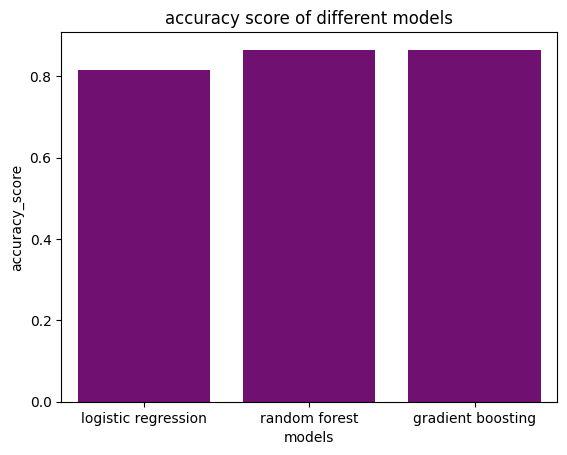

In [ ]:
sns.barplot(x=models,y=accuracy,color='purple')
plt.xlabel('models')
plt.ylabel('accuracy_score')
plt.title('accuracy score of different models')